In [1]:
import numpy as np               # array operations
import matplotlib.pyplot as plt
import os
import cv2                       # image operations

DATADIR = "C:/Users/Dell/Documents/test1"
CATEGORIES = ["11069_Boletus_edulis","15900_Lactarius_pubescens"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
        plt.imshow(img_arr, cmap="gray")
        plt.show()
        break
    break

<Figure size 640x480 with 1 Axes>

In [2]:
print(img_arr.shape)

(1447, 1835, 3)


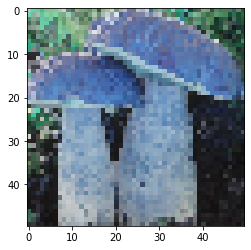

In [3]:
IMG_SIZE = 50

new_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_arr, cmap = 'gray')
plt.show()

In [4]:
training_data = []

def create_training_dataset():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_arr = cv2.resize(img_arr,(IMG_SIZE, IMG_SIZE))
                training_data.append([new_arr, class_num])
            except Exception as e:
                pass
            

create_training_dataset()

In [5]:
print(len(training_data))

471


In [6]:
import random 

random.shuffle(training_data)

In [7]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
1
0
0
1
0


In [8]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [9]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [10]:
#pickle_in = open("X.pickle", "rb")
#X = pickle.load(pickle_in) 

In [11]:
#X[1]